In [3]:
from keras.datasets import cifar100
from keras import utils as np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_Train4D_normalize=x_train/255
x_Test4D_normalize=x_test/255

169009152/169001437 [==============================] - 152s 1us/step


In [5]:
y_TrainOneHot=np_utils.to_categorical(y_train)
y_TestOneHot=np_utils.to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               295040    
__________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
x_Train4D_normalize=x_Train4D_normalize[:1000]
y_TrainOneHot=y_TrainOneHot[:1000]
train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=300, verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/20
 - 28s - loss: 4.6327 - acc: 0.0125 - val_loss: 4.6068 - val_acc: 0.0000e+00
Epoch 2/20
 - 20s - loss: 4.5955 - acc: 0.0150 - val_loss: 4.6044 - val_acc: 0.0000e+00
Epoch 3/20
 - 21s - loss: 4.5758 - acc: 0.0150 - val_loss: 4.6026 - val_acc: 0.0050
Epoch 4/20
 - 21s - loss: 4.5644 - acc: 0.0237 - val_loss: 4.6015 - val_acc: 0.0050
Epoch 5/20
 - 21s - loss: 4.5381 - acc: 0.0175 - val_loss: 4.6004 - val_acc: 0.0200
Epoch 6/20
 - 22s - loss: 4.5316 - acc: 0.0275 - val_loss: 4.5965 - val_acc: 0.0200
Epoch 7/20
 - 21s - loss: 4.4971 - acc: 0.0375 - val_loss: 4.5843 - val_acc: 0.0200
Epoch 8/20
 - 21s - loss: 4.4804 - acc: 0.0300 - val_loss: 4.5691 - val_acc: 0.0200
Epoch 9/20
 - 21s - loss: 4.4493 - acc: 0.0375 - val_loss: 4.5494 - val_acc: 0.0150
Epoch 10/20
 - 21s - loss: 4.3853 - acc: 0.0500 - val_loss: 4.5375 - val_acc: 0.0300
Epoch 11/20
 - 21s - loss: 4.3801 - acc: 0.0375 - val_loss: 4.5325 - val_acc: 0.0300
Epoch 12/20
 - 22s -

In [13]:
model.save('t05_fashion.h5')

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])   
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel("Epoch")
    plt.legend(['train','test'], loc = 'upper left')
    plt.show()

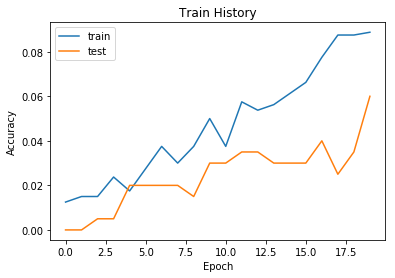

In [15]:
show_train_history('acc','val_acc')

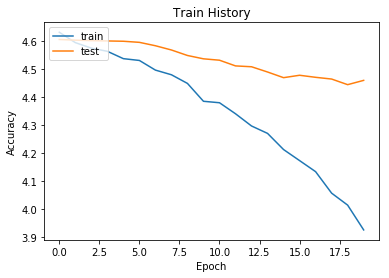

In [16]:
show_train_history('loss','val_loss')

In [17]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 462us/step


0.0449

In [18]:
prediction=model.predict_classes(x_Test4D_normalize)

In [19]:
prediction[:10]

array([73, 23, 48, 48, 84, 57, 84, 65, 71, 48], dtype=int64)

In [20]:
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'trunk'}

In [24]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        ax.set_title('label=' + str(labels[idx]) + ", prediction=" + str(prediction[idx]), fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

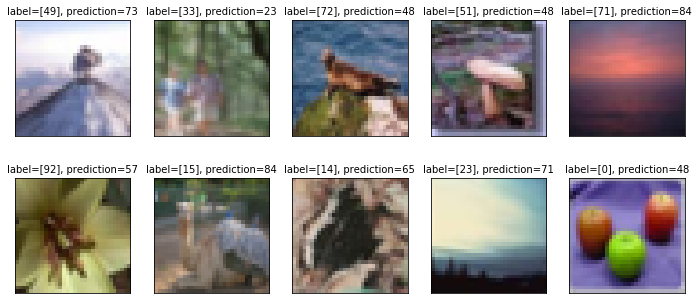

In [25]:
plot_images_labels_prediction(x_test, y_test, prediction, idx = 0)

In [26]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

Exception: Data must be 1-dimensional

In [32]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})

In [34]:
df[(df.label==5)&(df.predict==3)]

,label,predict
15,5,3
23,5,3
45,5,3
53,5,3
102,5,3
120,5,3
129,5,3
132,5,3
153,5,3
165,5,3
